In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('ks-projects-201801.csv', encoding = "ISO-8859-1")
data.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# Num observations
print(len(data))

378661


In [7]:
data['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
# This project is to differentiate between failed and successful projects. 
# Drop all projects that are canceled, undefined, live, and suspended.

data.drop(data[data['state']=='canceled'].index, inplace=True)
data.drop(data[data['state']=='undefined'].index, inplace=True)
data.drop(data[data['state']=='live'].index, inplace=True)
data.drop(data[data['state']=='suspended'].index, inplace=True)

# Reset the index for iteration purposes
data.reset_index(drop=True, inplace=True)

In [9]:
# There are about 64,000 more failed projects than successful projects in the dataset
data['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

Text(0, 0.5, 'Num Observations')

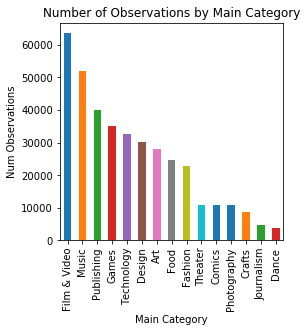

In [68]:
# Film & video is the most common category, with Dance being the least common
data['main_category'].value_counts().plot(kind='bar')
plt.title("Number of Observations by Main Category")
plt.xlabel('Main Category')
plt.ylabel('Num Observations')

In [11]:
# Calculate success rate by category

def Success_Rate(category):
    successful = 0
    failed = 0
    
    for i in range(len(data['main_category'])):
        if data['main_category'][i] == category:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

categories = list(data['main_category'].unique())
success_Rates = {}

for i in categories:
    success_Rates[i] = Success_Rate(i)
success_Rates

{'Art': 0.4488904488904489,
 'Comics': 0.5914152662482284,
 'Crafts': 0.2705295471987721,
 'Dance': 0.6543520850825637,
 'Design': 0.4159438574357357,
 'Fashion': 0.28283185840707964,
 'Film & Video': 0.4179064871654254,
 'Food': 0.2759136664550648,
 'Games': 0.43890466673679046,
 'Journalism': 0.24391419619185345,
 'Music': 0.5266055844523276,
 'Photography': 0.3411084735266797,
 'Publishing': 0.347016504443504,
 'Technology': 0.2378558225508318,
 'Theater': 0.6379613356766256}

In [12]:
# Kickstarted projects in theater, comics, dance, and music do particularly well, while technology, journalism, food, fashion, and crafts
# projects tend to struggle.

<function matplotlib.pyplot.show>

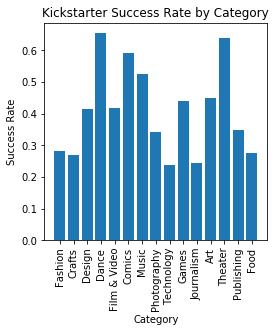

In [56]:
plt.bar(range(len(success_Rates)), list(success_Rates.values()), align='center')
plt.xticks(range(len(success_Rates)), list(success_Rates.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Category")
plt.xlabel("Category")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show


In [14]:
data['country'].value_counts()
# The vast majority of all projects are launched in the US

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [15]:
# Calculate success rate by country

def Success_Rate2(country):
    successful = 0
    failed = 0
    
    for i in range(len(data['country'])):
        if data['country'][i] == country:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

countries = list(data['country'].unique())
success_Rates_Co = {}
countries
for i in countries:
    success_Rates_Co[i] = Success_Rate2(i)
success_Rates_Co


{'AT': 0.22061855670103092,
 'AU': 0.30380894800483677,
 'BE': 0.29063097514340347,
 'CA': 0.3341956345998383,
 'CH': 0.28680981595092025,
 'DE': 0.27270081490104775,
 'DK': 0.38876889848812096,
 'ES': 0.2626801922050187,
 'FR': 0.3603174603174603,
 'GB': 0.40968968561146196,
 'HK': 0.4528301886792453,
 'IE': 0.30307467057101023,
 'IT': 0.18531025749261293,
 'JP': 0.30434782608695654,
 'LU': 0.3333333333333333,
 'MX': 0.2806520198440822,
 'N,0"': 0.5,
 'NL': 0.25591041061800085,
 'NO': 0.27835051546391754,
 'NZ': 0.3516483516483517,
 'SE': 0.3373094764744864,
 'SG': 0.3920704845814978,
 'US': 0.4181932966023875}

In [16]:
# Projects in the US, Hong Kong, and Great Britain perform better than projects launched elsewhere

<function matplotlib.pyplot.show>

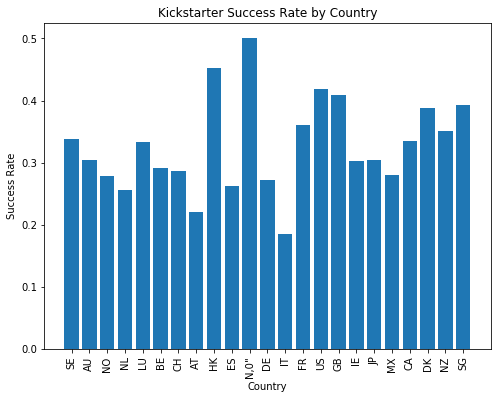

In [54]:
# Plot success rate by country

plt.bar(range(len(success_Rates_Co)), list(success_Rates_Co.values()), align='center')
plt.xticks(range(len(success_Rates_Co)), list(success_Rates_Co.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Country")
plt.xlabel("Country")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show

In [18]:
# Create new feature indicating number of words in the project's title

def word_count(column):
    spaces = 0
    for i in column:
        if i == ' ':
            spaces = spaces + 1
    # num words is 1 more than num spaces
    spaces = spaces + 1
    return spaces
     
word_Counts = []
for i in data['name']:
    word_Counts.append(word_count(str(i)))

data['numWords'] = word_Counts

In [19]:
data['numWords'].value_counts()

3     42452
4     41715
5     39389
6     36822
7     35293
8     32300
2     30231
9     26483
10    17713
1     14937
11     8846
12     3498
13     1153
14      406
15      217
16      109
17       52
18       22
19        9
20        5
21        5
22        4
28        4
23        2
29        2
32        2
33        1
25        1
27        1
41        1
Name: numWords, dtype: int64

In [20]:
# Calculate success rate by word count

def Success_Rate3(number):
    successful = 0
    failed = 0
    
    for i in range(len(data['numWords'])):
        if data['numWords'][i] == number:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

numWords = list(data['numWords'].unique())
success_Rates_NW = {}
for i in numWords:
    success_Rates_NW[i] = Success_Rate3(i)
success_Rates_NW

{1: 0.2962442257481422,
 2: 0.300089312295326,
 3: 0.3268397248657307,
 4: 0.38139757880858205,
 5: 0.4189240650943157,
 6: 0.43354516321764164,
 7: 0.45439605587510273,
 8: 0.46058823529411763,
 9: 0.4722652267492354,
 10: 0.46767910574154575,
 11: 0.45930364006330543,
 12: 0.44453973699256716,
 13: 0.4570685169124024,
 14: 0.45566502463054187,
 15: 0.4055299539170507,
 16: 0.43119266055045874,
 17: 0.3269230769230769,
 18: 0.45454545454545453,
 19: 0.5555555555555556,
 20: 0.2,
 21: 0.4,
 22: 0.25,
 23: 0.5,
 25: 0.0,
 27: 0.0,
 28: 0.5,
 29: 0.0,
 32: 0.0,
 33: 0.0,
 41: 0.0}

In [21]:
# Success rate increases with and increase in the number of words in the project's title until num_words reaches 9. Moving beyond 9 
# Words seems to negatively impact success rate.

<function matplotlib.pyplot.show>

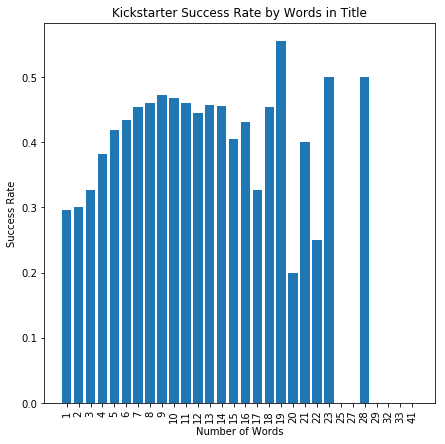

In [60]:
# Plot success rate by word count

plt.bar(range(len(success_Rates_NW)), list(success_Rates_NW.values()), align='center')
plt.xticks(range(len(success_Rates_NW)), list(success_Rates_NW.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Words in Title")
plt.xlabel("Number of Words")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 8]
plt.show

In [23]:
# Create new feature indicating whether or not the project title poses a question

def char_Finder(char, name):
    count = 0
    for i in name:
        if i == char:
            count = count+1
    if count == 0:
        return 0
    else:
        return 1
     
Questions = []
for i in data['name']:
    Questions.append(char_Finder('?', str(i)))
    
data['isQuestion'] = Questions

In [24]:
# Calculate success rate by whether or not the title poses a question

def Success_Rate4(number):
    successful = 0
    failed = 0
    
    for i in range(len(data['isQuestion'])):
        if data['isQuestion'][i] == number:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

dummies = [0,1]
success_Rates_Q = {}
for i in dummies:
    success_Rates_Q[i] = Success_Rate4(i)
success_Rates_Q

{0: 0.4041195904137843, 1: 0.37690484253301726}

In [25]:
# Projects that pose a question perform slighlty worse than projects that don't

<function matplotlib.pyplot.show>

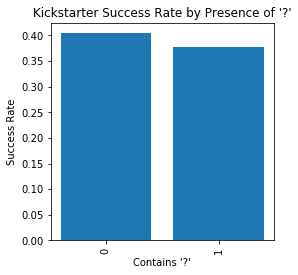

In [62]:
plt.bar(range(len(success_Rates_Q)), list(success_Rates_Q.values()), align='center')
plt.xticks(range(len(success_Rates_Q)), list(success_Rates_Q.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Presence of '?'")
plt.xlabel("Contains '?'")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 5]
plt.show

In [27]:
# Create new feature indicating whether or not project title contains an exclaimation

Exclaimations = []
for i in data['name']:
    Exclaimations.append(char_Finder('!', str(i)))
    
data['isExclaimation'] = Exclaimations

In [28]:
# Calculate success rate by whether or not the project uses an exclaimation point

def Success_Rate5(number):
    successful = 0
    failed = 0
    
    for i in range(len(data['isExclaimation'])):
        if data['isExclaimation'][i] == number:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

dummies = [0,1]
success_Rates_E = {}
for i in dummies:
    success_Rates_E[i] = Success_Rate5(i)
success_Rates_E

{0: 0.395778960632225, 1: 0.4827162092180218}

In [ ]:
# Projects using an exclaimation point are about 10% more likely to reach their goal.

<function matplotlib.pyplot.show>

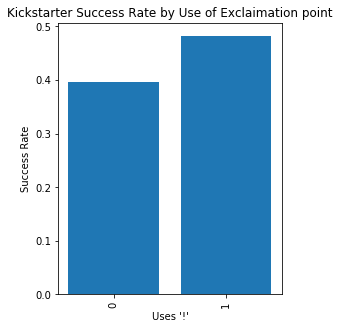

In [63]:
plt.bar(range(len(success_Rates_E)), list(success_Rates_E.values()), align='center')
plt.xticks(range(len(success_Rates_E)), list(success_Rates_E.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Use of Exclaimation point")
plt.xlabel("Uses '!'")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show

In [30]:
# Create new feature indicating whether or not the title is all lowercase

lowers = []
for i in data['name']:
    lowers.append(str(i).islower())
data['isLower'] = lowers

In [31]:
# Calculate success rate by whether or not the title is all lower case

def Success_Rate9(number):
    successful = 0
    failed = 0
    
    for i in range(len(data['isLower'])):
        if data['isLower'][i] == number:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

dummies = [True, False]
success_Rates_L = {}
for i in dummies:
    success_Rates_L[i] = Success_Rate9(i)
success_Rates_L

{False: 0.4054382857020895, True: 0.265658747300216}

In [ ]:
# Projects that use all lowercase are about 15% less likely to succeed than projects that don't.

<function matplotlib.pyplot.show>

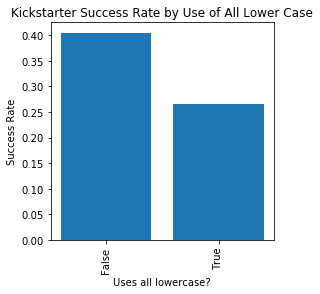

In [64]:
# Plot success rate by use of all lowercase
plt.bar(range(len(success_Rates_L)), list(success_Rates_L.values()), align='center')
plt.xticks(range(len(success_Rates_L)), list(success_Rates_L.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Use of All Lower Case")
plt.xlabel("Uses all lowercase?")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show

In [33]:
# Create new features indicating the day and month that a given project was launched
data['launched'] = pd.to_datetime(data['launched'])

days = []
for i in data['launched']:
    days.append(i.dayofweek)  
data['day'] = days

months = []
for i in data['launched']:
    months.append(i.month)  
data['month'] = months

In [34]:
# Calculate success rate by day 
def Success_Rate6(day):
    successful = 0
    failed = 0
    
    for i in range(len(data['day'])):
        if data['day'][i] == day:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

days = list(data['day'].unique())
success_Rates_D = {}
for i in days:
    success_Rates_D[i] = Success_Rate6(i)
success_Rates_D

{0: 0.40670205210630583,
 1: 0.4251953384635836,
 2: 0.40618926090557234,
 3: 0.4022858649193169,
 4: 0.38801464573676625,
 5: 0.3745315728644976,
 6: 0.404187851949046}

In [ ]:
# Projects launched on Monday are most likely to succeed, while projects launched on Thursday and Friday perform worse than other days.

In [35]:
# Calculate success rate by month
def Success_Rate7(month):
    successful = 0
    failed = 0
    
    for i in range(len(data['month'])):
        if data['month'][i] == month:
            if data['state'][i] == 'successful':
                successful = successful + 1
            else:
                failed = failed + 1
                
    return successful/(successful+failed)

months2 = list(data['month'].unique())
success_Rates_M = {}
for i in months2:
    success_Rates_M[i] = Success_Rate7(i)

success_Rates_M

{1: 0.388317699586286,
 2: 0.41873120980325,
 3: 0.4269435215946844,
 4: 0.4231724813661336,
 5: 0.41343616109682946,
 6: 0.40634383736582336,
 7: 0.36495141687755805,
 8: 0.3809188523147333,
 9: 0.4098007735532365,
 10: 0.4204255319148936,
 11: 0.41292450182430535,
 12: 0.3705789958294968}

In [ ]:
# Most months perform about the same, but July seems to lag behind at a 36% success rate

<function matplotlib.pyplot.show>

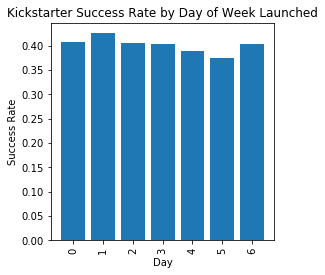

In [65]:
# Plot success rate by day
plt.bar(range(len(success_Rates_D)), list(success_Rates_D.values()), align='center')
plt.xticks(range(len(success_Rates_D)), list(success_Rates_D.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Day of Week Launched")
plt.xlabel("Day")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show

<function matplotlib.pyplot.show>

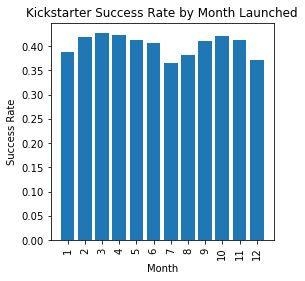

In [66]:
# Plot success rate by month
plt.bar(range(len(success_Rates_M)), list(success_Rates_M.values()), align='center')
plt.xticks(range(len(success_Rates_M)), list(success_Rates_M.keys()), rotation='vertical')
plt.title("Kickstarter Success Rate by Month Launched")
plt.xlabel("Month")
plt.ylabel("Success Rate")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show

In [38]:
# Create the final data frame with newly extracted features
finalDf = data[['main_category', 'goal', 'country', 'numWords', 'isQuestion', 'isExclaimation', 'day', 'month', 'state']]

In [39]:
finalDf = pd.get_dummies(finalDf, columns=['main_category', 'country', 'day', 'month'])

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
finalDf['y'] = le.fit_transform(finalDf['state'])

In [41]:
from sklearn.model_selection import train_test_split

X = finalDf.drop(labels=['state', 'y'], axis=1)
y = finalDf['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11111)

Test set accuracy is:  0.6655611668048541


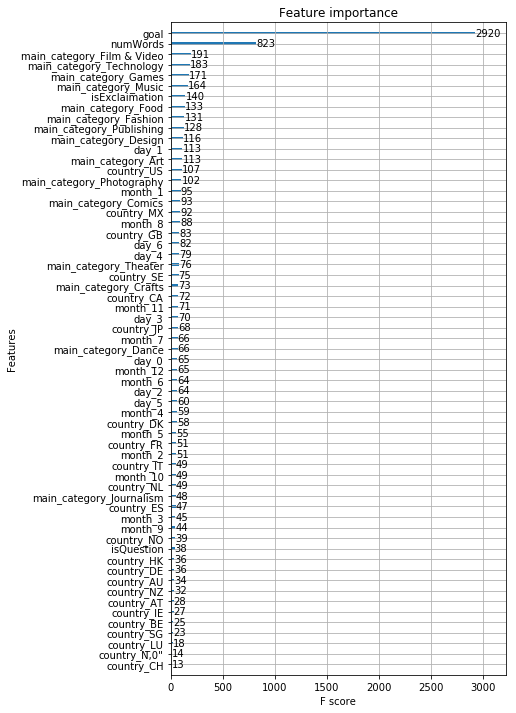

In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xg_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 1200, seed = 123)
xg_cl.fit(X, y)
preds = xg_cl.predict(X_test)
accuracy = accuracy_score(y_test, preds)
        
print('Test set accuracy is: ', accuracy)
            
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [6, 13]
plt.show()

In [ ]:
"""
The model correctly predicts if a project will succeed or fail just over 2/3 of the time. Far and away the most important feature is 
The goal set for the project. This makes sense: If a goal is absurdly high, it won't be as likely to reach it. The opposite is also true.
I was glad to see that one of my extracted features, numWords, was the second most important predictor.
"""

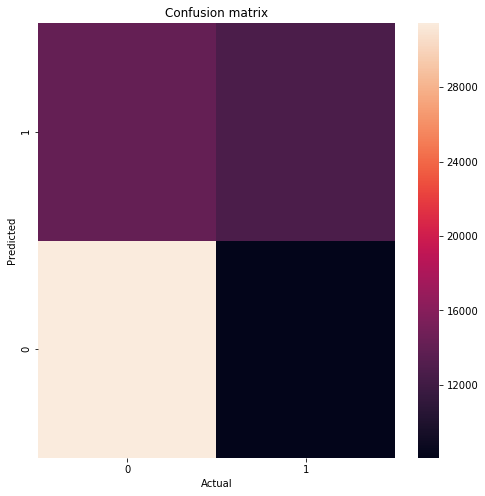

In [51]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

def plot_confusion_matrix(y_test, preds, size=None, normalize=False):
    
    cm = confusion_matrix(y_test, preds)
    fmt = "%d"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = "%.2f"
    xticklabels = list(sorted(set(preds)))
    yticklabels = list(sorted(set(y_test)))
    if size is not None:
        plt.figure(figsize=(size, size))
        heatmap(cm)
    if normalize:
        plt.title("Confusion matrix (norm.)")
    else:
        plt.title("Confusion matrix")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
    plt.gca().invert_yaxis() 
    
plot_confusion_matrix(y_test, preds, size=8, normalize=False)

In [ ]:
"""
Since there were 64,000 more observations of failed projects than successful projects, the model learned to identify failed projects
much better than successful ones. Thus, the most populated quadrant of the confusion matrix is true negative. While the model predicts
failed projects well, it does not predict successful projects well: when the model guesses that a project was succesful, it is more 
likely to produce a type 1 error than be correct. However, the model does not struggle with type 2 error, as there are hardly any 
observations of the model predicting that a project failed and being wrong compared to other predictions.
"""